# ANALISIS DE CONSUMO DE NETFLIX CON PYTHON

## 1. IMPORTACION Y CARGA DE DATOS

In [1]:
#from google.colab import files
#datos = files.upload()

In [2]:
import io
import pandas as pd

#df = pd.read_csv(io.BytesIO(datos['Netflix.csv']))
df = pd.read_csv('Netflix.csv')

## 2. ANALISIS EXPLORATORIO

In [3]:
df.shape

(1608, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1608 non-null   object
 1   Date    1608 non-null   object
dtypes: object(2)
memory usage: 25.2+ KB


In [5]:
df.head(50)

,Title,Date
0,1000 Miles from Christmas,25/12/2021
1,The Holiday,25/12/2021
2,Fauda: Season 3: Episode 7,15/12/2021
3,The Unforgivable,15/12/2021
4,Colin in Black & White: Limited Series: Cornrows,05/12/2021
5,14 Peaks: Nothing Is Impossible,05/12/2021
6,Fauda: Season 3: Episode 6,04/12/2021
7,Fauda: Season 3: Episode 5,04/12/2021
8,"Master of None: Season 3: Moments in Love, Cha...",02/12/2021
9,Mighty Little Bheem: Season 3: Bheem’s Snow Day,21/11/2021


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [6]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,[1000 Miles from Christmas]
1,[The Holiday]
2,"[Fauda, Season 3, Episode 7]"
3,[The Unforgivable]
4,"[Colin in Black & White, Limited Series, Cor..."
...,...
1603,"[Rasmus Klump, Episode 1]"
1604,"[Bamse, Skattkartan]"
1605,[Windfall]
1606,"[Crazy, Stupid, Love.]"


Aqui cuenta las separaciones y la longitud de la lista

In [7]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,[1000 Miles from Christmas],1
1,[The Holiday],1
2,"[Fauda, Season 3, Episode 7]",3
3,[The Unforgivable],1
4,"[Colin in Black & White, Limited Series, Cor...",3
...,...,...
1603,"[Rasmus Klump, Episode 1]",2
1604,"[Bamse, Skattkartan]",2
1605,[Windfall],1
1606,"[Crazy, Stupid, Love.]",1


Calcular los numeros de partes de los items mas frecuentes.

In [8]:
separacion_lista.num_partes.value_counts()

3    824
1    604
4    104
2     73
5      3
Name: num_partes, dtype: int64

Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [9]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
0,[1000 Miles from Christmas],1
1,[The Holiday],1
3,[The Unforgivable],1
24,[The Forgotten Battle],1
25,[Stuck Together],1
29,[A Family Reunion Christmas],1
30,[Love Hard],1
31,[Red Notice],1
32,[A Giant Jack Christmas],1
33,[Puppy Star Christmas],1


In [10]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
5,"[14 Peaks, Nothing Is Impossible]",2
89,"[Super Monsters, Vida's First Halloween]",2
106,"[Nymphomaniac, Volume 1]",2
239,"[The Christmas Chronicles, Part Two]",2
244,"[Fireman Sam, The Great Fire of PontyPandy]",2
257,"[David Attenborough, A Life on Our Planet]",2
268,"[LEGO Jurassic World, The Indominus Escape]",2
272,"[Department Q, The Absent One]",2
282,"[Lego DC Comics, Batman Be-Leaguered]",2
290,"[Anelka, Misunderstood]",2


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
2,"[Fauda, Season 3, Episode 7]",3
4,"[Colin in Black & White, Limited Series, Cor...",3
6,"[Fauda, Season 3, Episode 6]",3
7,"[Fauda, Season 3, Episode 5]",3
8,"[Master of None, Season 3, Moments in Love, ...",3
9,"[Mighty Little Bheem, Season 3, Bheem’s Snow...",3
10,"[Mighty Little Bheem, Season 3, The Wrestler]",3
11,"[Mighty Little Bheem, Season 3, Buttery Bheem]",3
12,"[Mighty Little Bheem, Season 3, A Trip to th...",3
13,"[Mighty Little Bheem, Season 3, Bheem at the...",3


In [12]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
66,"[Shaun the Sheep, Adventures from Mossy Botto...",4
67,"[Shaun the Sheep, Adventures from Mossy Botto...",4
68,"[Shaun the Sheep, Adventures from Mossy Botto...",4
69,"[Shaun the Sheep, Adventures from Mossy Botto...",4
70,"[Shaun the Sheep, Adventures from Mossy Botto...",4
71,"[Shaun the Sheep, Adventures from Mossy Botto...",4
72,"[Shaun the Sheep, Adventures from Mossy Botto...",4
73,"[Shaun the Sheep, Adventures from Mossy Botto...",4
110,"[The Parisian Agency, Exclusive Properties, ...",4
139,"[Inside the World’s Toughest Prisons, Season ...",4


In [13]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
605,"[Penn & Teller, Fool Us, Season 1, Pilot, ...",5
818,"[The Boss Baby, Back in Business, Season 1, ...",5
864,"[Abstract, The Art of Design, Season 1, Chr...",5


## 3. CREACIÓN DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 VARIABLES DERIVADAS DEL TÍTULO

Se utliza Numpy con where y con el criterio de separacion de lista 

In [14]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,[1000 Miles from Christmas],1,pelicula
1,[The Holiday],1,pelicula
2,"[Fauda, Season 3, Episode 7]",3,serie
3,[The Unforgivable],1,pelicula
4,"[Colin in Black & White, Limited Series, Cor...",3,serie
...,...,...,...
1603,"[Rasmus Klump, Episode 1]",2,pelicula
1604,"[Bamse, Skattkartan]",2,pelicula
1605,[Windfall],1,pelicula
1606,"[Crazy, Stupid, Love.]",1,pelicula


In [15]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,1000 Miles from Christmas,25/12/2021,pelicula
1,The Holiday,25/12/2021,pelicula
2,Fauda: Season 3: Episode 7,15/12/2021,serie
3,The Unforgivable,15/12/2021,pelicula
4,Colin in Black & White: Limited Series: Cornrows,05/12/2021,serie
...,...,...,...
1603,Rasmus Klump: Episode 1,19/10/2012,pelicula
1604,Bamse: Skattkartan,19/10/2012,pelicula
1605,Windfall,17/10/2012,pelicula
1606,"Crazy, Stupid, Love.",17/10/2012,pelicula


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [16]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3,4
0,1000 Miles from Christmas,None,None,None,None
1,The Holiday,None,None,None,None
2,Fauda,Season 3,Episode 7,None,None
3,The Unforgivable,None,None,None,None
4,Colin in Black & White,Limited Series,Cornrows,None,None
...,...,...,...,...,...
1603,Rasmus Klump,Episode 1,None,None,None
1604,Bamse,Skattkartan,None,None,None
1605,Windfall,None,None,None,None
1606,"Crazy, Stupid, Love.",None,None,None,None


In [17]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4','nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,1000 Miles from Christmas,None,None,None,None
1,The Holiday,None,None,None,None
2,Fauda,Season 3,Episode 7,None,None
3,The Unforgivable,None,None,None,None
4,Colin in Black & White,Limited Series,Cornrows,None,None
...,...,...,...,...,...
1603,Rasmus Klump,Episode 1,None,None,None
1604,Bamse,Skattkartan,None,None,None
1605,Windfall,None,None,None,None
1606,"Crazy, Stupid, Love.",None,None,None,None


In [18]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,1000 Miles from Christmas,25/12/2021,pelicula,1000 Miles from Christmas,None,None,None,None
1,The Holiday,25/12/2021,pelicula,The Holiday,None,None,None,None
2,Fauda: Season 3: Episode 7,15/12/2021,serie,Fauda,Season 3,Episode 7,None,None
3,The Unforgivable,15/12/2021,pelicula,The Unforgivable,None,None,None,None
4,Colin in Black & White: Limited Series: Cornrows,05/12/2021,serie,Colin in Black & White,Limited Series,Cornrows,None,None
...,...,...,...,...,...,...,...,...
1603,Rasmus Klump: Episode 1,19/10/2012,pelicula,Rasmus Klump,Episode 1,None,None,None
1604,Bamse: Skattkartan,19/10/2012,pelicula,Bamse,Skattkartan,None,None,None
1605,Windfall,17/10/2012,pelicula,Windfall,None,None,None,None
1606,"Crazy, Stupid, Love.",17/10/2012,pelicula,"Crazy, Stupid, Love.",None,None,None,None


### 3.2 VARIABLES DERIVADAS DE LA FECHA

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [19]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,1000 Miles from Christmas,pelicula,1000 Miles from Christmas,None,None,None,None,2021-12-25
1,The Holiday,pelicula,The Holiday,None,None,None,None,2021-12-25
2,Fauda: Season 3: Episode 7,serie,Fauda,Season 3,Episode 7,None,None,2021-12-15
3,The Unforgivable,pelicula,The Unforgivable,None,None,None,None,2021-12-15
4,Colin in Black & White: Limited Series: Cornrows,serie,Colin in Black & White,Limited Series,Cornrows,None,None,2021-05-12
...,...,...,...,...,...,...,...,...
1603,Rasmus Klump: Episode 1,pelicula,Rasmus Klump,Episode 1,None,None,None,2012-10-19
1604,Bamse: Skattkartan,pelicula,Bamse,Skattkartan,None,None,None,2012-10-19
1605,Windfall,pelicula,Windfall,None,None,None,None,2012-10-17
1606,"Crazy, Stupid, Love.",pelicula,"Crazy, Stupid, Love.",None,None,None,None,2012-10-17


In [20]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2021-12-25,1000 Miles from Christmas,pelicula,1000 Miles from Christmas,None,None,None,None
2021-12-25,The Holiday,pelicula,The Holiday,None,None,None,None
2021-12-15,Fauda: Season 3: Episode 7,serie,Fauda,Season 3,Episode 7,None,None
2021-12-15,The Unforgivable,pelicula,The Unforgivable,None,None,None,None
2021-05-12,Colin in Black & White: Limited Series: Cornrows,serie,Colin in Black & White,Limited Series,Cornrows,None,None
...,...,...,...,...,...,...,...
2012-10-19,Rasmus Klump: Episode 1,pelicula,Rasmus Klump,Episode 1,None,None,None
2012-10-19,Bamse: Skattkartan,pelicula,Bamse,Skattkartan,None,None,None
2012-10-17,Windfall,pelicula,Windfall,None,None,None,None


Creamos una función para extraer los componentes.

In [21]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [22]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2021-12-25,1000 Miles from Christmas,pelicula,1000 Miles from Christmas,None,None,None,None,2021,December,25,Saturday
2021-12-25,The Holiday,pelicula,The Holiday,None,None,None,None,2021,December,25,Saturday
2021-12-15,Fauda: Season 3: Episode 7,serie,Fauda,Season 3,Episode 7,None,None,2021,December,15,Wednesday
2021-12-15,The Unforgivable,pelicula,The Unforgivable,None,None,None,None,2021,December,15,Wednesday
2021-05-12,Colin in Black & White: Limited Series: Cornrows,serie,Colin in Black & White,Limited Series,Cornrows,None,None,2021,May,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2012-10-19,Rasmus Klump: Episode 1,pelicula,Rasmus Klump,Episode 1,None,None,None,2012,October,19,Friday
2012-10-19,Bamse: Skattkartan,pelicula,Bamse,Skattkartan,None,None,None,2012,October,19,Friday
2012-10-17,Windfall,pelicula,Windfall,None,None,None,None,2012,October,17,Wednesday


## 4. ANALISIS

¿Cuanto tiempo hace que tengo contratado Netflix?

In [23]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Katherine, llevas usando Netflix {tiempo.days} dias')

Katherine, llevas usando Netflix 3365 dias


¿Cuanto me he gastado en Netflix hasta ahora?

In [24]:
coste_mensual = 12

gasto = tiempo.days / 30 * coste_mensual

print(f'Katherine, hasta ahora te has gastado {gasto} euros en Netflix')

Katherine, hasta ahora te has gastado 1346.0 euros en Netflix


¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [25]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Katherine, al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Katherine, al año dedicas 8 dias de tu vida a ver series y 15 dias de tu vida a ver pelis


¿Cuales son las 10 series de las que he visto más capítulos?

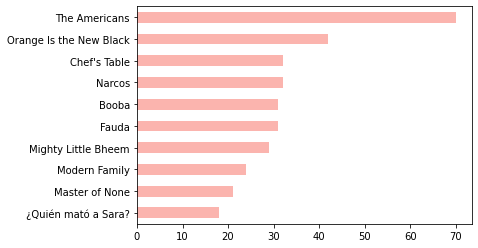

In [26]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

Echo en falta mi serie favorita! Hijos de la Anarquía. Vamos a hacer una consulta de los títulos que incluyan ese nombre para ver por qué.

In [27]:
df[df.Title.str.contains('Orange')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2019-12-07,Orange Is the New Black: Season 4: (Don’t) Say...,serie,Orange Is the New Black,Season 4,(Don’t) Say Anything,None,None,2019,December,7,Saturday
2019-03-01,Orange Is the New Black: Season 4: Power Suit,serie,Orange Is the New Black,Season 4,Power Suit,None,None,2019,March,1,Friday
2018-12-19,Orange Is the New Black: Season 4: Work That B...,serie,Orange Is the New Black,Season 4,Work That Body for Me,None,None,2018,December,19,Wednesday
2018-12-15,Orange Is the New Black: Season 3: Trust No Bitch,serie,Orange Is the New Black,Season 3,Trust No Bitch,None,None,2018,December,15,Saturday
2018-10-12,Orange Is the New Black: Season 3: Don’t Make ...,serie,Orange Is the New Black,Season 3,Don’t Make Me Come Back There,None,None,2018,October,12,Friday
2018-02-12,Orange Is the New Black: Season 3: We Can Be H...,serie,Orange Is the New Black,Season 3,We Can Be Heroes,None,None,2018,February,12,Monday
2018-11-29,Orange Is the New Black: Season 3: A Tittin' a...,serie,Orange Is the New Black,Season 3,A Tittin' and a Hairin',None,None,2018,November,29,Thursday
2018-11-24,Orange Is the New Black: Season 3: Where My Dr...,serie,Orange Is the New Black,Season 3,Where My Dreidel At,None,None,2018,November,24,Saturday
2018-11-22,"Orange Is the New Black: Season 3: Fear, and O...",serie,Orange Is the New Black,Season 3,"Fear, and Other Smells",None,None,2018,November,22,Thursday


¿Qué día de la semana suelo ver más series?

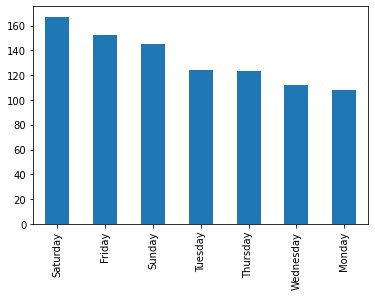

In [28]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

¿Existen diferencias en cuando veo Netflix entre series y películas?

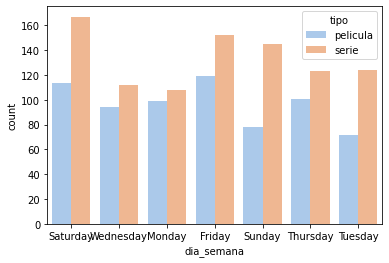

In [29]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

¿El consumo a lo largo del año es constante o hay meses que consumo más?

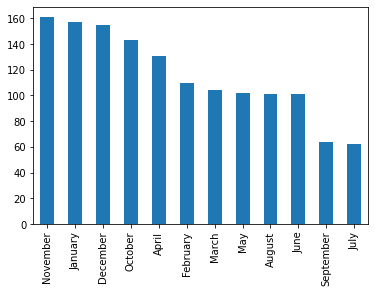

In [30]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

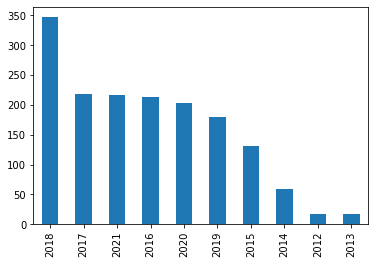

In [31]:
df.año.value_counts().plot.bar();